In [5]:
import os
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import ttest_ind
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error as mae 
from scipy import stats
import seaborn as sns

In [6]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
cwd_PRISMA = cwd + "\\PRISMA Raster Raw\\Merged"
cwd_PRISMA_Result = cwd + "\\ResultsPRISMA"
cwd_Field_Data1 = cwd_Field + '\\Field Dataset 1'
cwd_Field_Data1_CSV = cwd_Field_Data1 + "\\CSV"

In [7]:
# Get the name of all the rasters in our folder
raster_Names = []
for item in [name.split('.')[0] for name in os.listdir(cwd_PRISMA)]:
    if item not in raster_Names:
        raster_Names.append(item)
raster_Names

['PRS_L2D_STD_20220611_20220710_NS_mosaic_crop_smooth_v2i',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i',
 'PRS_L2D_STD_20220906_20220911_NS_mosaic_crop_smooth_v2i_new']

In [8]:
df_Raster_6 = pd.read_csv(cwd_PRISMA_Result + "\\" + raster_Names[0] + "\\AlphaDiversity150m.csv", sep = '\t')
df_Raster_9 = pd.read_csv(cwd_PRISMA_Result + "\\" + raster_Names[1] + "_New\\AlphaDiversity150m.csv", sep = '\t')
df_Raster_6.head()

,Plot,Species_Richness,Fisher,Shannon,Simpson,FRic,FEve,FDiv
0,FOR01,4.85,0,1.220394,0.643520,31.363383,0.686332,0.673173
1,FOR02,3.40,0,0.704629,0.395139,28.311459,0.835691,0.763680
2,FOR03,3.15,0,0.640166,0.356236,19.854418,0.815189,0.727990
3,FOR04,4.50,0,1.277334,0.675680,24.156822,0.813479,0.676139
4,FOR05,2.60,0,0.794103,0.511111,23.358456,0.778715,0.646900


In [9]:
df_Raster_Merge = pd.merge(df_Raster_6[['Plot','Species_Richness','Shannon','Simpson']],df_Raster_9[['Plot','Species_Richness','Shannon','Simpson']], on = 'Plot', suffixes= [' June', ' Sep'])
df_Raster_Merge.head()

,Plot,Species_Richness June,Shannon June,Simpson June,Species_Richness Sep,Shannon Sep,Simpson Sep
0,FOR01,4.85,1.220394,0.643520,5.30,1.248683,0.651360
1,FOR02,3.40,0.704629,0.395139,2.30,0.476854,0.284028
2,FOR03,3.15,0.640166,0.356236,4.20,1.048838,0.568934
3,FOR04,4.50,1.277334,0.675680,1.40,0.223184,0.153280
4,FOR05,2.60,0.794103,0.511111,1.25,0.134043,0.089342


In [10]:
df_Raster_Merge.columns = ['Plot','Raster Species Richness June','Raster Shannon June','Raster Simpson June','Raster Species Richness Sep','Raster Shannon Sep','Raster Simpson Sep']
df_Raster_Merge.head()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep
0,FOR01,4.85,1.220394,0.643520,5.30,1.248683,0.651360
1,FOR02,3.40,0.704629,0.395139,2.30,0.476854,0.284028
2,FOR03,3.15,0.640166,0.356236,4.20,1.048838,0.568934
3,FOR04,4.50,1.277334,0.675680,1.40,0.223184,0.153280
4,FOR05,2.60,0.794103,0.511111,1.25,0.134043,0.089342


In [11]:
df_Association = pd.read_csv(cwd_Field_Data1_CSV + "\\FieldData1 Valid Association.csv")
df_Association.head()

,Plot,Association
0,FOR01,Oak_hornbeam_humid
1,FOR02,Prunus
2,FOR03,Prunus
3,FOR04,Oak_open_canopy
4,FOR05,Oak_open_canopy


In [12]:
df_Raster_Merge_1 = pd.merge(df_Raster_Merge.iloc[0:63,:],df_Association,on='Plot')
df_Raster_Merge_1.tail()

,Plot,Raster Species Richness June,Raster Shannon June,Raster Simpson June,Raster Species Richness Sep,Raster Shannon Sep,Raster Simpson Sep,Association
58,FOR78,2.05,0.478046,0.30864,2.85,0.490702,0.26432,Prunus
59,FOR79,6.70,1.457530,0.67472,4.35,1.108974,0.59296,Mixed deciduous
60,FOR80,5.05,1.378696,0.70656,4.45,1.264846,0.67920,Mixed deciduous
61,FOR81,7.60,1.681769,0.75232,3.90,0.902414,0.49472,Mixed deciduous
62,FOR82,8.50,1.915231,0.82336,2.35,0.640601,0.40048,Mixed deciduous


## Species Richness

In [13]:
df_Field_Richness = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid SpeciesRichness.csv")
df_Field_Richness.head()

,Plot,Field Species Richness
0,FOR01,5
1,FOR02,7
2,FOR03,4
3,FOR04,2
4,FOR05,1


In [14]:
df_Field_Richness_1 = df_Field_Richness.copy().iloc[0:63,:]
df_Field_Richness_1.tail()

,Plot,Field Species Richness
58,FOR78,2
59,FOR79,4
60,FOR80,3
61,FOR81,4
62,FOR82,4


In [15]:
df_Richness_1 = pd.merge(df_Field_Richness_1,df_Raster_Merge_1[['Plot','Association','Raster Species Richness June','Raster Species Richness Sep']],on = 'Plot')
df_Richness_1.head()

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
0,FOR01,5,Oak_hornbeam_humid,4.85,5.30
1,FOR02,7,Prunus,3.40,2.30
2,FOR03,4,Prunus,3.15,4.20
3,FOR04,2,Oak_open_canopy,4.50,1.40
4,FOR05,1,Oak_open_canopy,2.60,1.25


In [16]:
df_Richness_1.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,63.000000,63.000000,63.000000
mean,3.507937,5.603175,3.857937
std,1.865415,1.633788,1.197585
min,1.000000,2.050000,1.250000
25%,2.000000,4.525000,3.050000
50%,3.000000,5.300000,4.000000
75%,4.000000,6.650000,4.550000
max,8.000000,9.100000,6.800000


In [17]:
df_Richness_1_Asso = df_Richness_1.copy().sort_values('Association')
df_Richness_1_Asso

,Plot,Field Species Richness,Association,Raster Species Richness June,Raster Species Richness Sep
20,FOR21,4,Alder,4.20,4.05
19,FOR20,3,Alder,7.95,3.15
35,FOR55,2,Alder,4.70,2.60
7,FOR08,4,Alder,7.30,4.25
36,FOR56,2,Alder,5.05,2.40
...,...,...,...,...,...
24,FOR25,1,Pine,6.50,6.60
30,FOR31,2,Pine,5.55,5.30
58,FOR78,2,Prunus,2.05,2.85
2,FOR03,4,Prunus,3.15,4.20


In [18]:
list_Plot_Outlier = ['FOR72','FOR59','FOR51', 'FOR69','FOR29']
df_Richness_1_Asso_NoOut = df_Richness_1_Asso.copy()
# Drop those outliers! 
df_Richness_1_Asso_NoOut = df_Richness_1_Asso_NoOut[~df_Richness_1_Asso_NoOut['Plot'].isin(list_Plot_Outlier)]
df_Richness_1_Asso_NoOut.describe()

,Field Species Richness,Raster Species Richness June,Raster Species Richness Sep
count,58.000000,58.000000,58.000000
mean,3.568966,5.709483,3.893966
std,1.826818,1.614258,1.212764
min,1.000000,2.050000,1.250000
25%,2.000000,4.587500,3.062500
50%,4.000000,5.350000,4.050000
75%,4.000000,6.775000,4.600000
max,8.000000,9.100000,6.800000


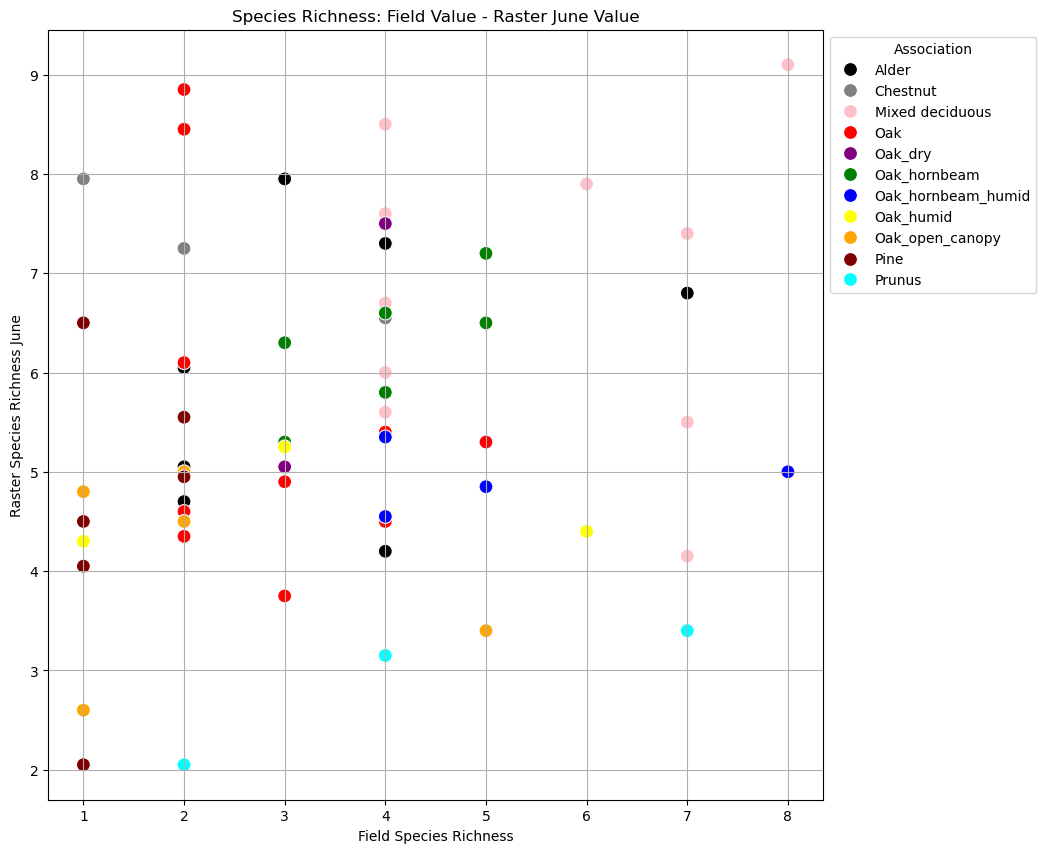

In [19]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value')
plt.show()

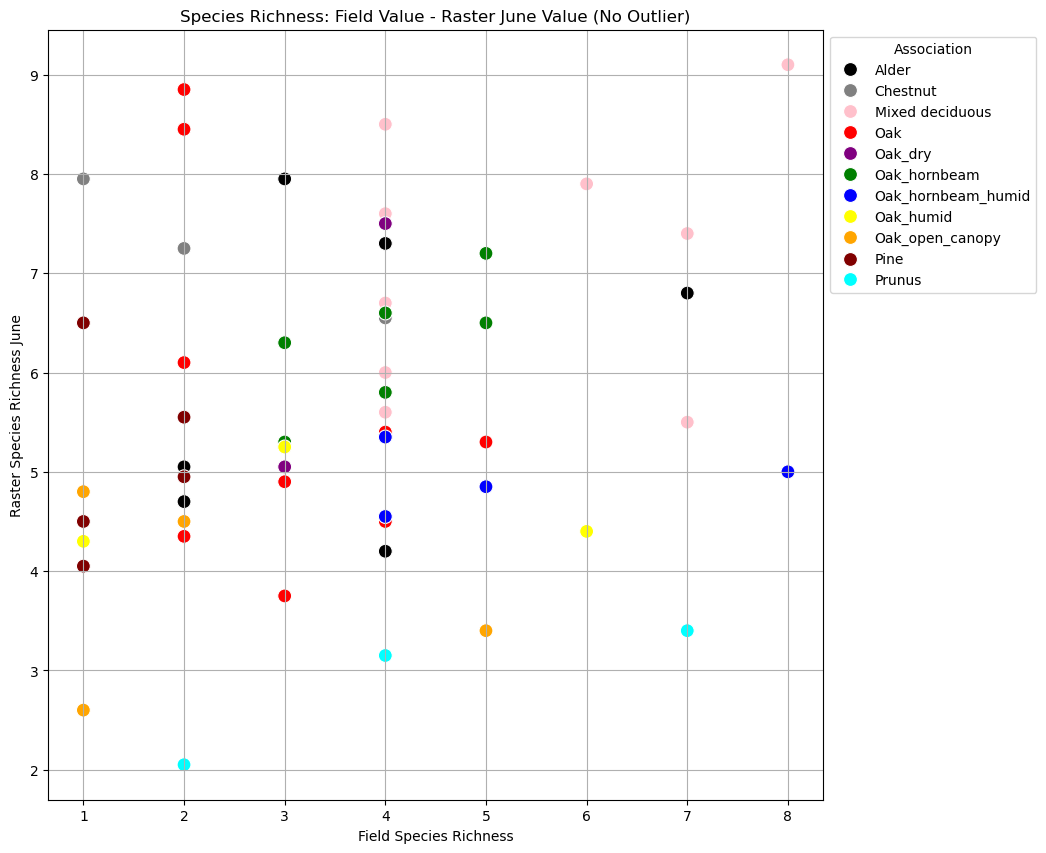

In [20]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness June', data = df_Richness_1_Asso_NoOut, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster June Value (No Outlier)')
plt.show()

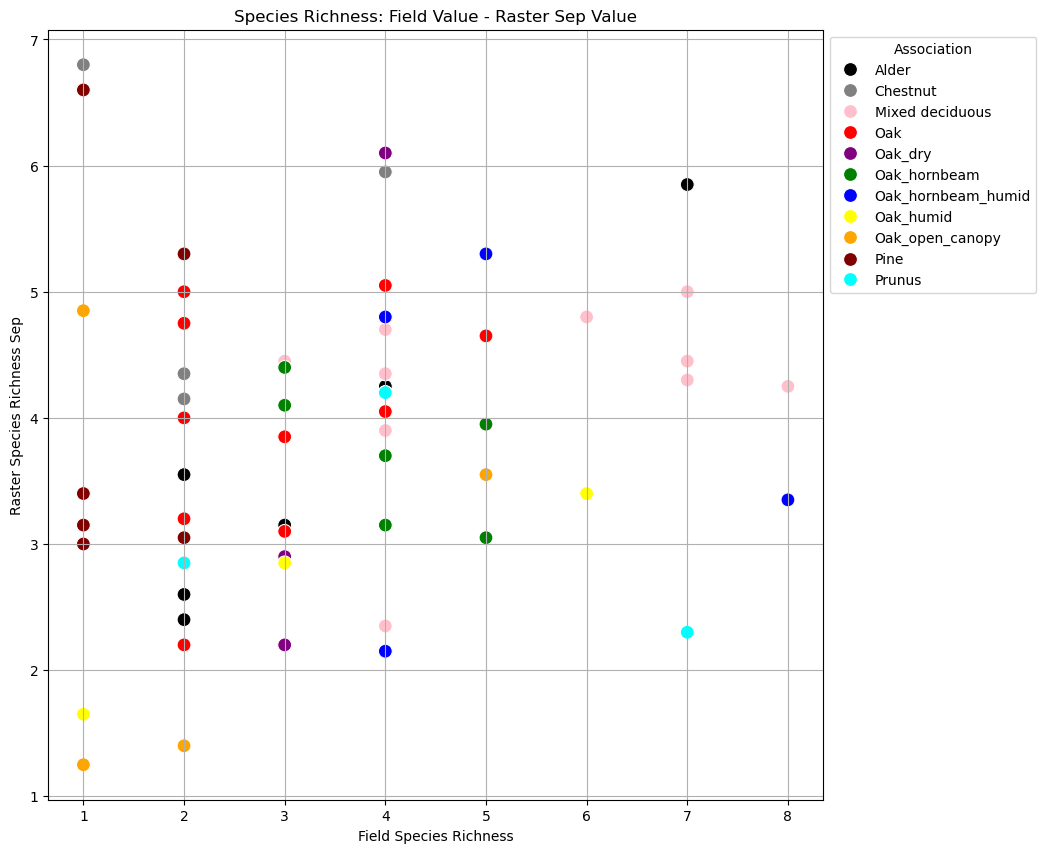

In [21]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Species Richness',y = 'Raster Species Richness Sep', data = df_Richness_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Species Richness: Field Value - Raster Sep Value')
plt.show()

In [22]:
from scipy.spatial import distance
from scipy.stats import kendalltau
distance.correlation(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

0.8261593349834246

In [23]:
distance.correlation(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

0.8137573047695557

In [58]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-6.706563558326794
6.300932426204598e-10
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.17384066501657536; the p value is 0.17301264650137804
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [64]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-6.686923982226576
8.849099786096152e-10
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!
The Pearson correlation coefficient is equal to 0.1599558833314859; the p value is 0.23036844353462044
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [26]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

-1.7445000735726905

In [27]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness June'])

2.5825396825396827

In [57]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-1.2532029556580868
0.21248977051607382
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to 0.1862426952304443; the p value is 0.14388527089423198
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [56]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Species Richness and Raster Species Richness!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Richness_1_Asso_NoOut['Field Species Richness'], df_Richness_1_Asso_NoOut['Raster Species Richness Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.1:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!" + str(pear.pvalue))

-1.1287878719547588
0.2613571316079889
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to 0.12946380183422612; the p value is 0.3327508417717848
Indecisive! The Pearson correlation coefficient is not considered statistically significant!0.3327508417717848


In [30]:
r2_score(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

-0.2087939596821664

In [31]:
mae(df_Richness_1['Field Species Richness'], df_Richness_1['Raster Species Richness Sep'])

1.5087301587301585

## Shannon

In [32]:
df_Field_Shannon = pd.read_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv")
df_Field_Shannon.head()

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000


In [33]:
df_Field_Shannon_1 = df_Field_Shannon.copy().iloc[0:63,:]

In [34]:
df_Shannon_1 = pd.merge(df_Field_Shannon_1,df_Raster_Merge_1[['Plot','Association','Raster Shannon June','Raster Shannon Sep']],on = 'Plot')
df_Shannon_1.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
58,FOR78,0.286836,Prunus,0.478046,0.490702
59,FOR79,1.344339,Mixed deciduous,1.457530,1.108974
60,FOR80,0.918320,Mixed deciduous,1.378696,1.264846
61,FOR81,1.301362,Mixed deciduous,1.681769,0.902414
62,FOR82,1.193337,Mixed deciduous,1.915231,0.640601


In [35]:
df_Shannon_1_Asso = df_Shannon_1.copy().sort_values('Association')
df_Shannon_1_Asso.tail()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
24,FOR25,0.000000,Pine,1.475436,1.522793
30,FOR31,0.146145,Pine,1.263050,1.229529
58,FOR78,0.286836,Prunus,0.478046,0.490702
2,FOR03,0.534923,Prunus,0.640166,1.048838
1,FOR02,1.604816,Prunus,0.704629,0.476854


In [36]:
df_Shannon_1_Asso.describe()

,Field Shannon,Raster Shannon June,Raster Shannon Sep
count,63.000000,63.000000,63.000000
mean,0.793971,1.336324,0.926895
std,0.519653,0.350657,0.343610
min,0.000000,0.478046,0.134043
25%,0.401475,1.125400,0.725882
50%,0.804448,1.302468,0.953207
75%,1.180566,1.618153,1.147888
max,1.794190,1.957159,1.565660


In [37]:
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso.copy()
df_Shannon_1_Asso_NoZero = df_Shannon_1_Asso_NoZero.loc[df_Shannon_1_Asso_NoZero['Field Shannon']!=0]
df_Shannon_1_Asso_NoZero.head()

,Plot,Field Shannon,Association,Raster Shannon June,Raster Shannon Sep
20,FOR21,0.942002,Alder,1.054235,0.919363
19,FOR20,0.886464,Alder,1.802663,0.892134
35,FOR55,0.276191,Alder,1.261348,0.717257
7,FOR08,0.804448,Alder,1.732130,1.099750
36,FOR56,0.482578,Alder,0.970977,0.540343


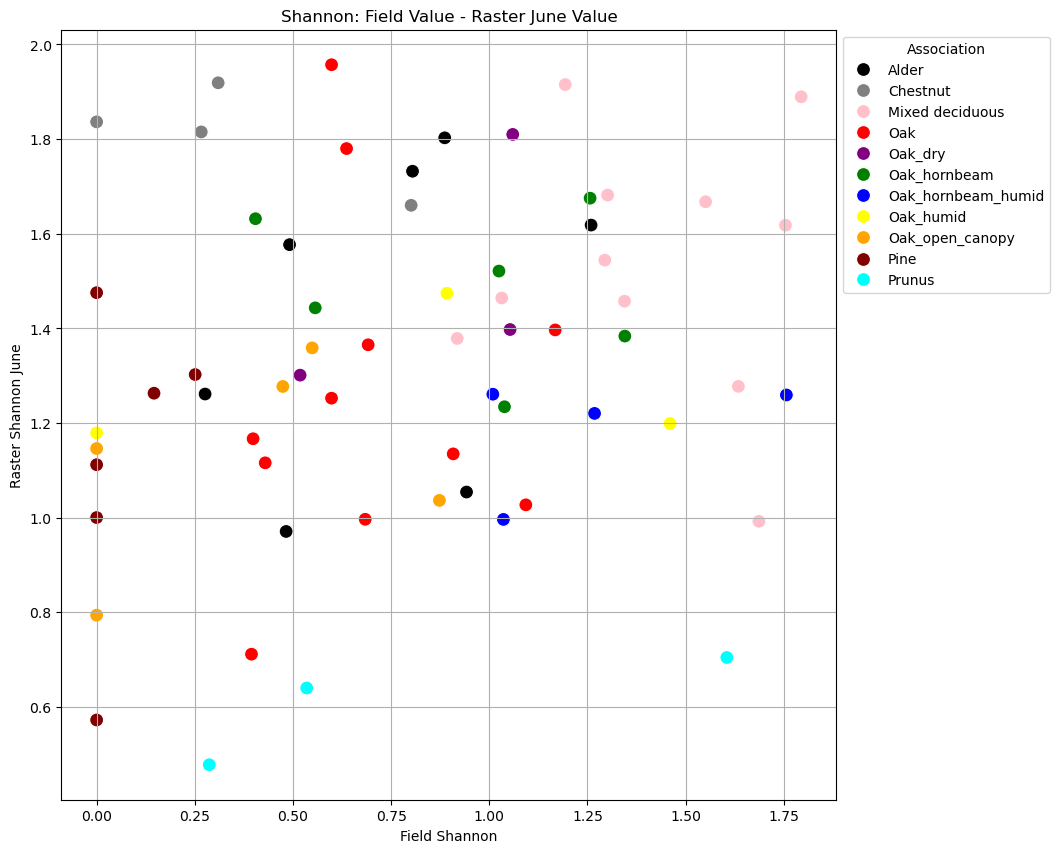

In [38]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon June', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: Field Value - Raster June Value')
plt.show()

In [59]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon June'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon June'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.1:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-6.866823677484813
2.804866333334491e-10
We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!
The Pearson correlation coefficient is equal to 0.22068302358275332; the p value is 0.08220382819509112
Perfect! The Pearson correlation coefficient is considered statistically significant!


In [40]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

-1.2643565347036856

In [41]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.6375516537220022

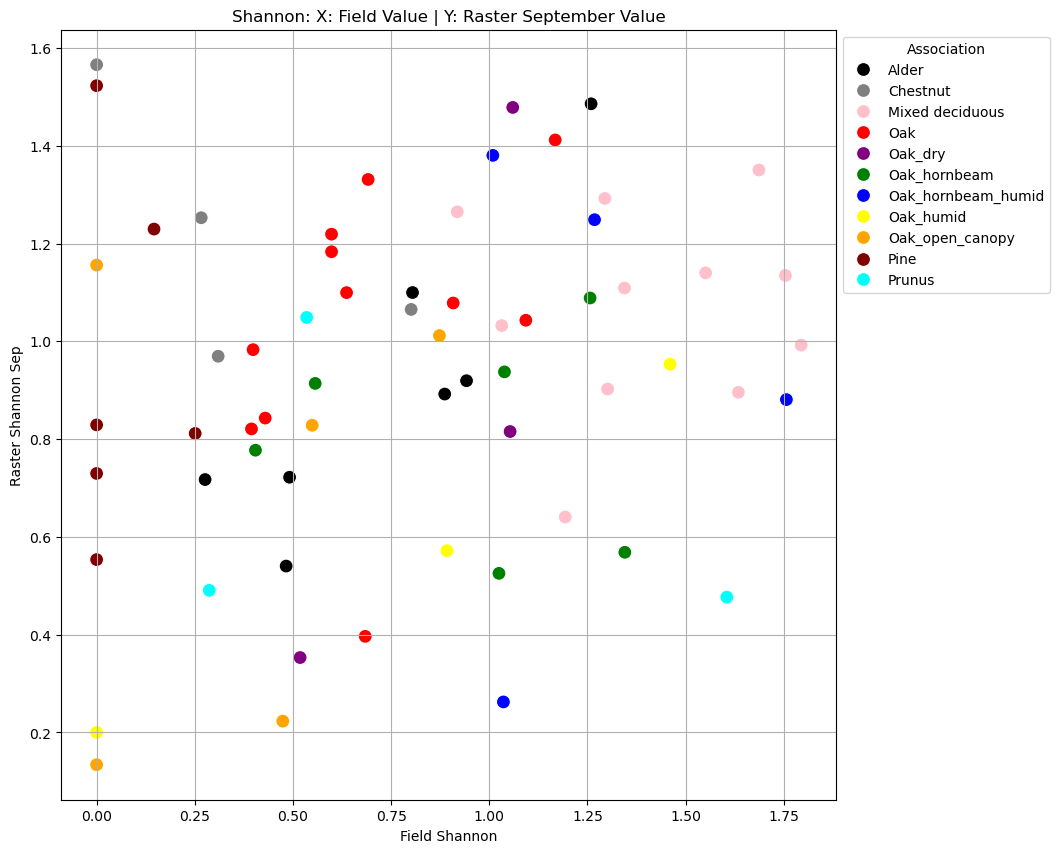

In [42]:
fig, ax1 = plt.subplots(figsize = (10,10))
sns.scatterplot(x = 'Field Shannon',y = 'Raster Shannon Sep', data = df_Shannon_1_Asso, hue = 'Association', 
                palette=['Black','Grey','Pink','Red','Purple','Green','Blue','Yellow','Orange','Maroon','Aqua'],
                s=100, ax = ax1)
sns.move_legend(ax1,'upper left',bbox_to_anchor= (1,1))
ax1.grid()
plt.title('Shannon: X: Field Value | Y: Raster September Value')
plt.show()

In [60]:
# Null hypothesis! 
t_stat, pvalue = ttest_ind(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon Sep'])
print(t_stat)
print(pvalue)
if pvalue < 0.05:
    print("We reject NULL HYPOTHESIS! Therefore we can conclude that there is a definite relationship between Field Shannon Index and Raster Shannon Index!")
else: 
    print("We fail to reject NULL HYPOTHESIS!")
# Pearson Coefficient
pear = stats.pearsonr(df_Shannon_1_Asso['Field Shannon'], df_Shannon_1_Asso['Raster Shannon Sep'])
print("The Pearson correlation coefficient is equal to " + str(pear.statistic) + "; the p value is " + str(pear.pvalue))
if pear.pvalue <= 0.05:
    print("Perfect! The Pearson correlation coefficient is considered statistically significant!")
else:
    print("Indecisive! The Pearson correlation coefficient is not considered statistically significant!")

-1.6935404903160658
0.09286326545331595
We fail to reject NULL HYPOTHESIS!
The Pearson correlation coefficient is equal to 0.19861497862071187; the p value is 0.11864647194132423
Indecisive! The Pearson correlation coefficient is not considered statistically significant!


In [44]:
r2_score(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

-0.24104994292065185

In [45]:
mae(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.4592182192011715

In [46]:
distance.correlation(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])

0.801385021379288

In [47]:
distance.correlation(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])

0.7793169764172466

In [48]:
tau, p_value = kendalltau(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon June'])
print(tau)
print(p_value)

0.14698681229148236
0.09058757643799387


In [49]:
tau, p_value = kendalltau(df_Shannon_1['Field Shannon'], df_Shannon_1['Raster Shannon Sep'])
print(tau)
print(p_value)

0.1531757307037553
0.0778058578320015


In [50]:
tau, p_value = kendalltau(df_Richness_1_Asso['Field Species Richness'], df_Richness_1_Asso['Raster Species Richness June'])
print(tau)
print(p_value)

0.14928243725326484
0.10824691024176104


In [51]:
tau, p_value = kendalltau(df_Richness_1_Asso['Field Species Richness'], df_Richness_1_Asso['Raster Species Richness Sep'])
print(tau)
print(p_value)

0.1793704601821006
0.053915145790544475
